In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()



# reflect the tables
Base.prepare(autoload_with=engine)



In [7]:
# View all of the classes that automap found
Hawaii = Base.classes.keys()
Hawaii

['measurement', 'station']

In [8]:
# Save references to each table
Measurements = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
session.query(Measurements.date).order_by(Measurements.date.desc()).first()


('2017-08-23',)

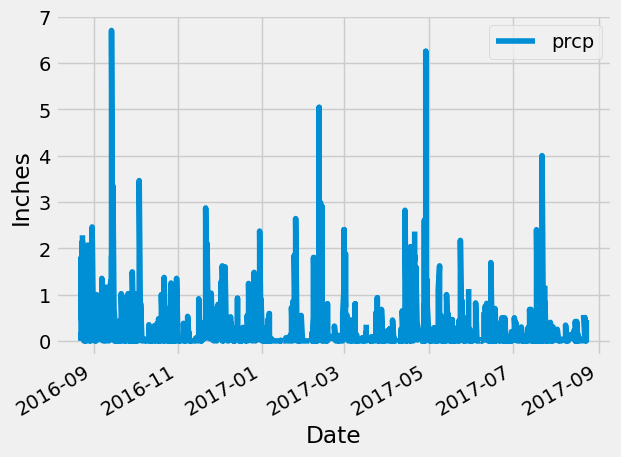

In [63]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores.
date_precipitation = session.query(Measurements.date,Measurements.prcp).\
                                filter(Measurements.date >= '2016-08-23').\
                                order_by(Measurements.date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(date_precipitation, columns = ['date','prcp'])

# Sort the dataframe by date
df.sort_values('date')

df['date'] = pd.to_datetime(df['date'])

# Use Pandas Plotting with Matplotlib to plot the data
# Plot the Results in a Matplotlib bar chart
df.plot(x='date', y='prcp')
plt.tight_layout()
plt.ylabel('Inches')
plt.xlabel('Date')
plt.show()


In [64]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [65]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [66]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurements.station,func.count(Measurements.station)).group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [67]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurements.tobs),func.max(Measurements.tobs),func.avg(Measurements.tobs)).\
                                filter(Measurements.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(close=None, block=None)>

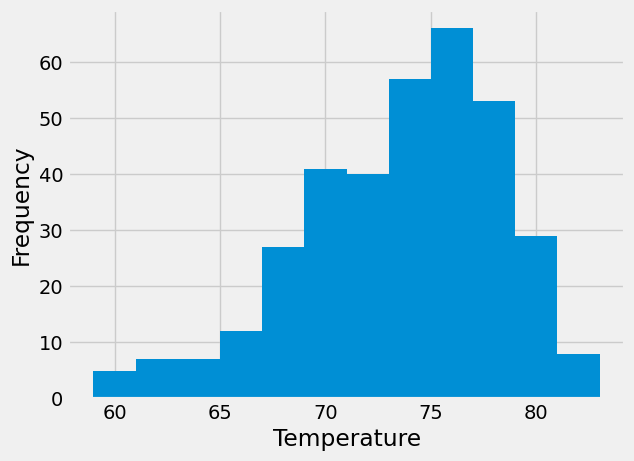

In [70]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_freq = session.query(Measurements.tobs).\
                    filter(Measurements.date >= '2016-08-23').\
                    filter(Measurements.station == 'USC00519281').all()

# Saved the query results as a Pandas DataFrame. Explicitly set the column names as in the previous example
# df_temp = pd.DataFrame(temp_freq, columns = ['tobs'])
df_temp = pd.DataFrame(temp_freq)

plt.hist(df_temp['tobs'], bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show


# Close Session

In [71]:
# Close Session
session.close()